<a href="https://colab.research.google.com/github/akashcx/Machine-Learning-Projects/blob/main/Car%20Purchase%20Decision%20Prediction/Car_Purchase_Decision_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('car_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [ ]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
df[df.duplicated()]

,User ID,Gender,Age,AnnualSalary,Purchased


In [ ]:
df = df.drop('User ID',axis=1)
cat = pd.get_dummies(df['Gender'],drop_first=True)

df = df.drop('Gender',axis=1)
df = pd.concat([cat,df],axis=1)

In [ ]:
df.head()

,Male,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [ ]:
print('Purchased 0 =',len(df[df['Purchased']==0]))
print('Purchased 1 =',len(df[df['Purchased']==1]))

Purchased 0 = 598
Purchased 1 = 402


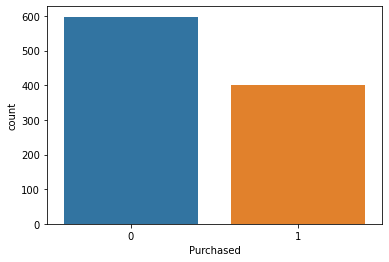

In [ ]:
sns.countplot(x='Purchased',data=df)

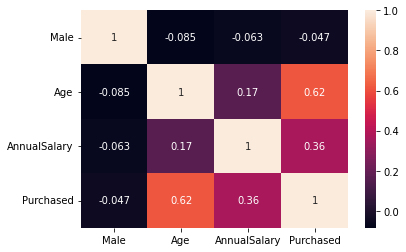

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(solver='saga')
lrgrid = {'penalty' : ['l1','l2'],
        'max_iter' : list(range(50,550,50))
}
lrclf = RandomizedSearchCV(lr,lrgrid,cv=5)

In [ ]:
lrclf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
                   param_distributions={'max_iter': [50, 100, 150, 200, 250,
                                                     300, 350, 400, 450, 500],
                                        'penalty': ['l1', 'l2']})

In [ ]:
lrclf.best_params_

{'max_iter': 250, 'penalty': 'l1'}

In [ ]:
lrpred = lrclf.predict(X_test)

In [ ]:
print(classification_report(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       128
           1       0.79      0.69      0.74        72

    accuracy                           0.82       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.82      0.82      0.82       200



In [ ]:
print(confusion_matrix(y_test,lrpred))

[[115  13]
 [ 22  50]]


In [ ]:
knn = KNeighborsClassifier()
knngrid = {'n_neighbors' : list(range(2,21))}

knnclf = RandomizedSearchCV(knn,knngrid,cv=5)

In [ ]:
knnclf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14, 15,
                                                        16, 17, 18, 19, 20]})

In [ ]:
knnclf.best_params_

{'n_neighbors': 19}

In [ ]:
knnpred = knnclf.predict(X_test)

In [ ]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       128
           1       0.85      0.92      0.88        72

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [ ]:
print(confusion_matrix(y_test,knnpred))

[[116  12]
 [  6  66]]


In [ ]:
dt = DecisionTreeClassifier()
dtgrid = {'criterion' : ['gini','entropy'],
        'max_depth' : list(range(5,50,5)),
        'min_samples_split' : list(range(2,10)),
        'min_samples_leaf' : list(range(1,10))   
}
dtclf = RandomizedSearchCV(dt,dtgrid,cv=5)

In [ ]:
dtclf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9]})

In [ ]:
dtclf.best_params_

{'criterion': 'gini',
 'max_depth': 35,
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [ ]:
dtpred = dtclf.predict(X_test)

In [ ]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       128
           1       0.88      0.85      0.87        72

    accuracy                           0.91       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.91      0.90       200



In [ ]:
print(confusion_matrix(y_test,dtpred))

[[120   8]
 [ 11  61]]


In [ ]:
rf = RandomForestClassifier()
rfgrid = {'n_estimators' : list(range(5,55,5)),
        'criterion' : ['gini','entropy'],
        'max_depth' : list(range(5,100,5)),
        'min_samples_split' : list(range(2,10)),
        'min_samples_leaf' : list(range(1,10))
}
rfclf = RandomizedSearchCV(rf,rfgrid,cv=5)

In [ ]:
rfclf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50]})

In [ ]:
rfclf.best_params_

{'criterion': 'gini',
 'max_depth': 45,
 'min_samples_leaf': 7,
 'min_samples_split': 9,
 'n_estimators': 30}

In [ ]:
rfpred = rfclf.predict(X_test)

In [ ]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       128
           1       0.86      0.90      0.88        72

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [ ]:
print(confusion_matrix(y_test,rfpred))

[[117  11]
 [  7  65]]


In [ ]:
print("Logistic Regression Accuracy:",lrclf.score(X_test,y_test))

Logistic Regression Accuracy: 0.825


In [ ]:
print("K Nearest Neighbors Classifier Accuracy:",knnclf.score(X_test,y_test))

K Nearest Neighbors Classifier Accuracy: 0.91


In [ ]:
print("Decision Tree Classifier Accuracy:",dtclf.score(X_test,y_test))

Decision Tree Classifier Accuracy: 0.905


In [ ]:
print("Random Forest Classifier Accuracy:",rfclf.score(X_test,y_test))

Random Forest Classifier Accuracy: 0.91
